In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv(r"C:\Users\Ashraful\Documents\Data Analysis\train.csv")

In [73]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [31]:
null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


In [33]:
# filling empty coloumn with 0
df['Postal Code'].fillna(0, inplace = True)

#changing from float to int
df['Postal Code'] = df ['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

C:\Users\Ashraful\AppData\Local\Temp\ipykernel_2492\174510154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace = True)


In [105]:
# data description
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Data Cleaning
## Cheking for duplicates

In [107]:
if df.duplicated().sum() > 0:
    print('Duplicates are Present')
else:
    print('No Duplicates exist')


No Duplicates exist


# Exploratory Data Analysis
## Customer Analysis
### Customer Segmentation


In [109]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [111]:
types_of_customer = df['Segment'].unique()
print(types_of_customer)

['Consumer' 'Corporate' 'Home Office']


In [119]:
# numbers of customers in each segment
number_of_customer = df['Segment'].value_counts().reset_index()
number_of_customer.columns = ['Segment', 'CustomerCount']
print(number_of_customer)

       Segment  CustomerCount
0     Consumer           5101
1    Corporate           2953
2  Home Office           1746


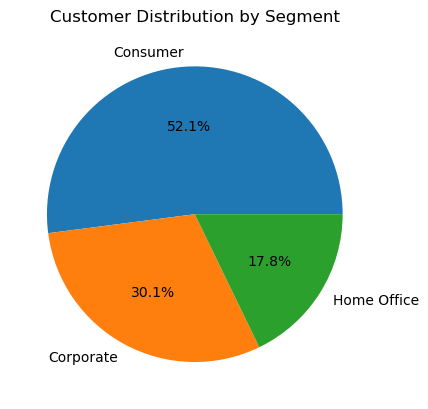

In [135]:
#Ploting a pie chart
plt.pie(number_of_customer['CustomerCount'], labels=number_of_customer['Segment'], autopct='%1.1f%%',)
plt.title('Customer Distribution by Segment')
plt.show()

# Customers and Sales

In [144]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category
print(sales_per_category)

       Segment         Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


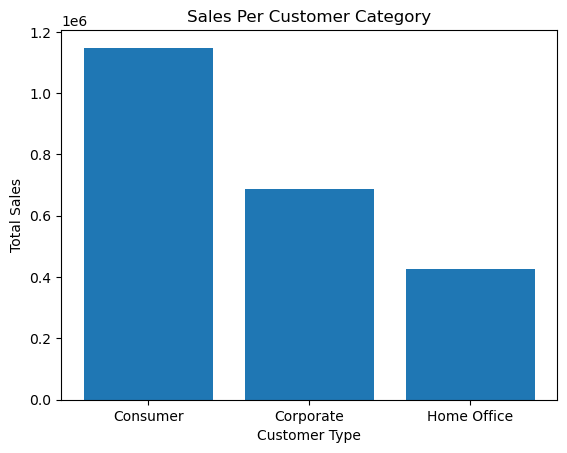

In [148]:
plt.bar(sales_per_category['Segment'], sales_per_category['Sales'])
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.title('Sales Per Customer Category')
plt.show()

# Customer Layality

In [151]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [159]:
# Group data according to : Customer Id, Customer Name, and calculate freq. of thie order
customer_order = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order.rename(columns={'Order ID' : 'Total Orders'}, inplace = True)
print(customer_order)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[793 rows x 4 columns]


In [173]:
# Group data by Customer ID, Customer Name, and Segment, and calculate the frequency of their orders
customer_order = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# Rename the order column
customer_order.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Identify repeat customers (those with at least one order)
repeat_customers = customer_order[customer_order['Total Orders'] > 1]

# Sort repeat customers in descending order of Total Orders
sorted_repeat_customers = repeat_customers.sort_values(by='Total Orders', ascending=False)

# Display the top 10 repeat customers
print(sorted_repeat_customers.head(10).reset_index(drop = True))


  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    AP-10915       Arthur Prichep     Consumer            31
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [177]:
# group data based on: Customer ID, Customer Name, Sales
customer_sales = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index()

top_spenders = customer_sales.sort_values(by='Sales', ascending = False)
print(top_spenders.head(10).reset_index(drop = False))

   index Customer ID       Customer Name      Sales
0    700    SM-20320         Sean Miller  25043.050
1    741    TC-20980        Tamara Chand  19052.218
2    621    RB-19360        Raymond Buch  15117.339
3    730    TA-21385        Tom Ashbrook  14595.620
4      6    AB-10105       Adrian Barton  14473.571
5    434    KL-16645        Ken Lonsdale  14175.229
6    669    SC-20095        Sanjit Chand  14142.334
7    327    HL-15040        Hunter Lopez  12873.298
8    683    SE-20110        Sanjit Engle  12209.438
9    131    CC-12370  Christopher Conant  12129.072


# Mode of Shiping

In [180]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [184]:
typing_of_shiping = df['Ship Mode'].unique()
print(typing_of_shiping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [198]:
#frequency of ship mode
shiping_mode = df['Ship Mode'].value_counts().reset_index()
shiping_mode.columns = ['Ship Mode', 'Frequency']
print(shiping_mode)

        Ship Mode  Frequency
0  Standard Class       5859
1    Second Class       1902
2     First Class       1501
3        Same Day        538


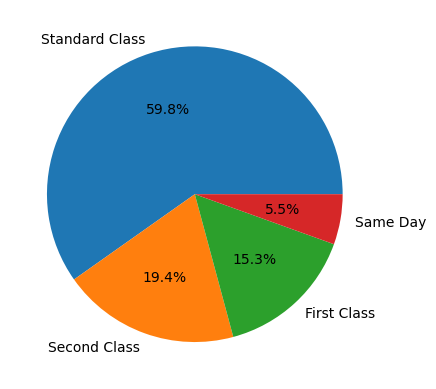

In [206]:
#ploting a pie chart 
plt.pie(shiping_mode['Frequency'], labels=shiping_mode['Ship Mode'], autopct='%1.1f%%')
plt.show()

# Graphical Analaysis

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
# Customer by state
state = df['State'].value_counts().reset_index()
state.columns = ['State', 'Number of Customers']
print(state.head(10))

            State  Number of Customers
0      California                 1946
1        New York                 1097
2           Texas                  973
3    Pennsylvania                  582
4      Washington                  504
5        Illinois                  483
6            Ohio                  454
7         Florida                  373
8        Michigan                  253
9  North Carolina                  247


In [ ]:
# Customer by city

In [30]:
city = df['City'].value_counts().reset_index()
city.columns = ['City', 'Number of Customer']
print(city.head(10))

            City  Number of Customer
0  New York City                 891
1    Los Angeles                 728
2   Philadelphia                 532
3  San Francisco                 500
4        Seattle                 426
5        Houston                 374
6        Chicago                 308
7       Columbus                 221
8      San Diego                 170
9    Springfield                 161


In [46]:
#sales for per state
sales = df.groupby('State')['Sales'].sum().reset_index()
top_state_sales = sales.sort_values(by='Sales', ascending = False)
print(top_state_sales.head(10).reset_index(drop = True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


# Product Analysis

In [49]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [51]:
# types of category product
category = df['Category'].unique()
print(category)

['Furniture' 'Office Supplies' 'Technology']


In [75]:
# group data by product category
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_sort = subcategory_count.sort_values(by = 'Sub-Category', ascending = False)
print(subcategory_sort.reset_index(drop = True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [85]:
# sales per each category
sales_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_category = sales_category.sort_values(by = 'Sales', ascending = False)
print(sales_category.reset_index(drop = True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


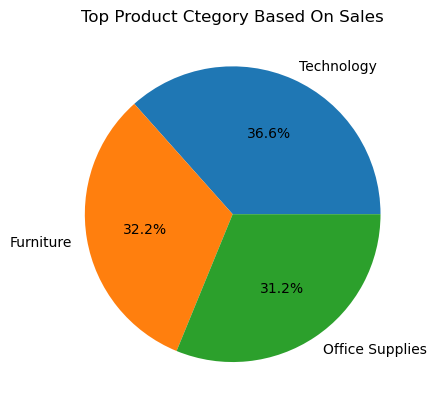

In [93]:
#ploting a pie chart
plt.pie(sales_category['Sales'], labels=sales_category['Category'], autopct='%1.1f%%')
plt.title('Top Product Ctegory Based On Sales')
plt.show()

In [95]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [103]:
#group data by product sub-category vs sales
sub_category_sales = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending = False)
print(sub_category_sales.reset_index(drop = True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


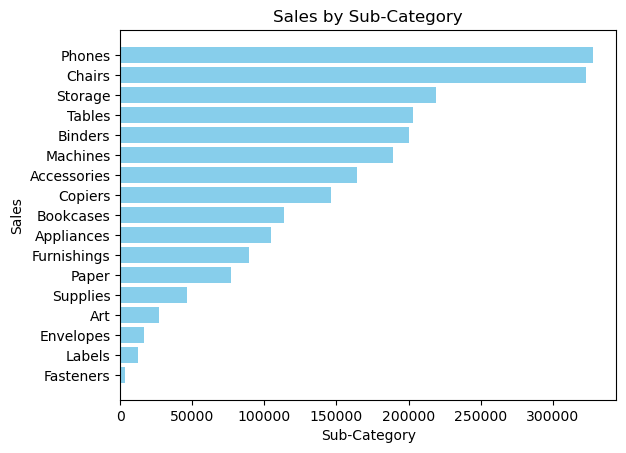

In [145]:

sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending = True)
# Plot the bar chart
plt.barh(sub_category_sales['Sub-Category'], sub_category_sales['Sales'], color='skyblue')

# Add labels and title for clarity
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Sales by Sub-Category')

# Display the plot
plt.show()


In [153]:

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
# Group by year and sum the sales
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()

# Rename columns for clarity (optional)
yearly_sales.columns = ['Year', 'Total Sales']

# Print the result
print(yearly_sales)


   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


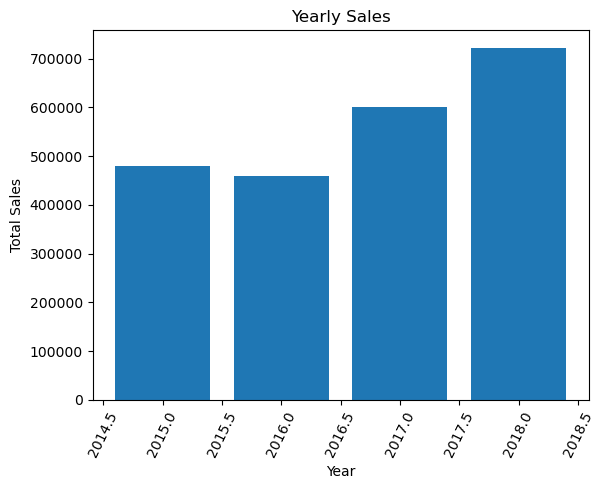

In [157]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation= 64)
plt.show()

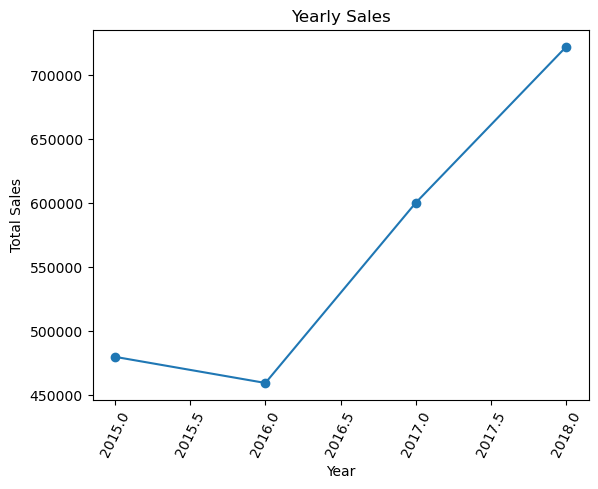

In [159]:
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker = 'o')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation= 64)
plt.show()

In [161]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [164]:
# Monthly Sales trend for a year
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df(df['Order Date'].dt.year = 2018)
monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum()
print(monthly_sales)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (491165223.py, line 3)

In [170]:
import pandas as pd

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter for the year 2018
yearly_sales = df[df['Order Date'].dt.year == 2018]

# Resample by month and sum the sales
monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum().reset_index()



# Print the monthly sales trend
print(monthly_sales)


   Order Date        Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


C:\Users\Ashraful\AppData\Local\Temp\ipykernel_9648\539889978.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = yearly_sales.resample('M', on='Order Date')['Sales'].sum().reset_index()


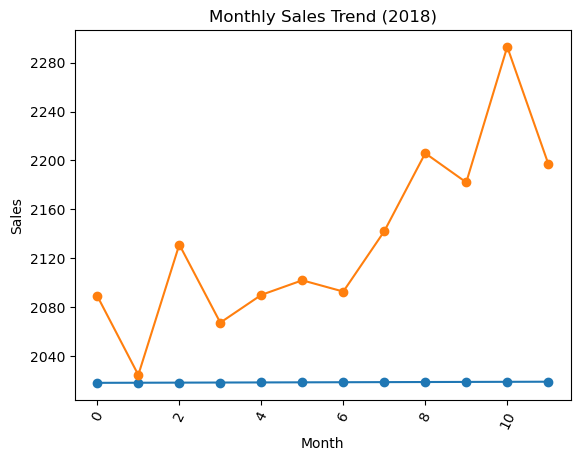

In [176]:
import matplotlib.pyplot as plt

# Plot the monthly sales trend
plt.plot(monthly_sales.index, monthly_sales, marker='o')

# Add title and labels
plt.title('Monthly Sales Trend (2018)')
plt.xlabel('Month')
plt.ylabel('Sales')

# Rotate x-axis labels for readability
plt.xticks(rotation=64)

# Display the plot
plt.show()
